# The Sparks Foundation

Type: Perform Exploratory Analysis on a Sample Superstore Dataset

Task 3: As a business manager try to find out the weak areas where you would   like to make a profit

Author: Sahil Purohit

Language: Python

Source: Google Colab

1. Importing the gdrive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


2. Importing the Libraries

In [ ]:
import pandas as pd  # manipulation of raw data
import numpy as np   # mathematical calculations
import matplotlib.pyplot as plt   # plotting graphs
import seaborn as sns
%matplotlib inline

3. Importing the Dataset

In [ ]:
data=pd.read_csv('/gdrive/My Drive/Sparks Foundation/Data Set/SampleSuperstore.csv')

In [ ]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
# Getting the dimensions of the dataset
data.shape

(9994, 13)

In [ ]:
# Checking for the missing values
data.isnull().sum(axis=0)

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

We can see that there are no missing values in our dataset

4. Getting Information about the dataset


In [ ]:
data.describe

<bound method NDFrame.describe of            Ship Mode    Segment        Country  ... Quantity Discount    Profit
0       Second Class   Consumer  United States  ...        2     0.00   41.9136
1       Second Class   Consumer  United States  ...        3     0.00  219.5820
2       Second Class  Corporate  United States  ...        2     0.00    6.8714
3     Standard Class   Consumer  United States  ...        5     0.45 -383.0310
4     Standard Class   Consumer  United States  ...        2     0.20    2.5164
...              ...        ...            ...  ...      ...      ...       ...
9989    Second Class   Consumer  United States  ...        3     0.20    4.1028
9990  Standard Class   Consumer  United States  ...        2     0.00   15.6332
9991  Standard Class   Consumer  United States  ...        2     0.20   19.3932
9992  Standard Class   Consumer  United States  ...        4     0.00   13.3200
9993    Second Class   Consumer  United States  ...        2     0.00   72.9480

[9994

Checking For duplicate Records

In [ ]:
duplicate=data.duplicated()
print(duplicate.sum())
data[duplicate]

17


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


Removing the duplicate items

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data_1=data.duplicated()
data_1.sum()

0

Creating a  boxplot for the smooth handling of outliers for the sales column

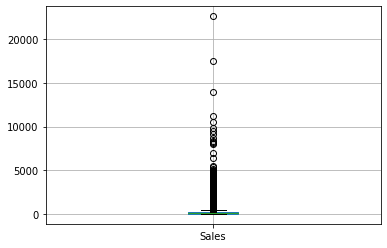

In [ ]:
# Managing the outliers
data.boxplot(column=["Sales"])
plt.show()

Removing the outliers

In [ ]:
#Removing outliers
def remove_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  IQR=q3-q1
  lower_quartile_range=q1-(1.5*IQR)
  upper_quartile_range=q3+(1.5*IQR)
  return lower_quartile_range, upper_quartile_range

In [ ]:
low_sales,up_sales=remove_outlier(data['Sales'])
data['Sales']=np.where(data['Sales']>up_sales,up_sales,data['Sales'])
data['Sales']=np.where(data['Sales']<low_sales,low_sales,data['Sales'])

Creating a boxplot for the sales column a

<function matplotlib.pyplot.show>

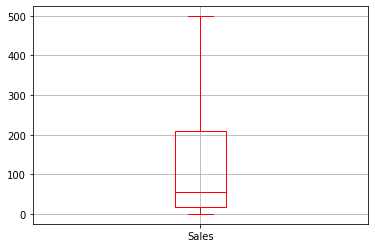

In [ ]:
data.boxplot(column=["Sales"],color="red")
plt.show

From the above box plot we can see that the outliers for the sales column have been removed successfully

Creating a box plot for the detection of ouliers in the profit column

<function matplotlib.pyplot.show>

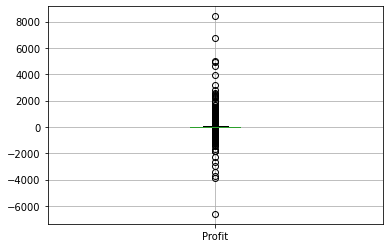

In [ ]:
data.boxplot(column=["Profit"])
plt.show

Removing the outliers from the profit column

In [ ]:
low_profit,up_profit=remove_outlier(data['Profit'])
data['Profit']=np.where(data['Profit']>up_profit,up_profit,data['Profit'])
data['Profit']=np.where(data['Profit']<low_profit,low_profit,data['Profit'])

Creating a box plot of the profits column

<function matplotlib.pyplot.show>

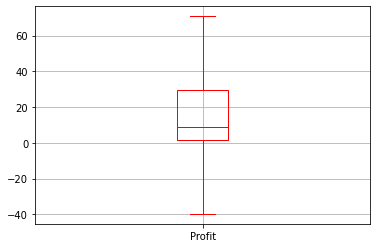

In [ ]:
data.boxplot(column=["Profit"],color="red")
plt.show

From the above box plot we can see that the outiers for the profit column have been removed successfully

Creating a heatmap of our dataset

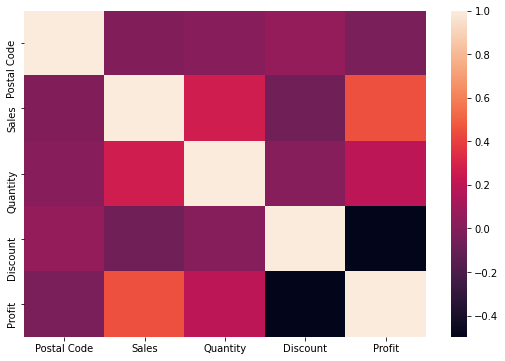

In [ ]:
fig, axes = plt.subplots(1,1, figsize = (9,6))
sns.heatmap(data.corr())
plt.show()

From the above heatmap we can see that the the profit also have a strong negative correlation between them.

We can also see that the sales and the profit also have a weak positive correlation

Plotting a graph for each of the above category

<Figure size 720x720 with 0 Axes>

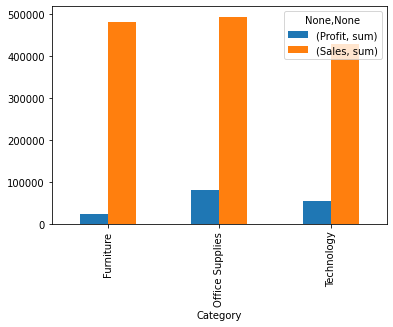

In [ ]:
plt.figure(figsize=(10,10))
data.groupby('Category')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.show()

<Figure size 720x720 with 0 Axes>

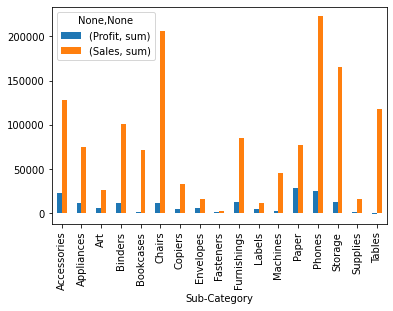

In [ ]:
plt.figure(figsize=(10,10))
data.groupby('Sub-Category')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.show()

From the above graph we can see that paper gies the maximum profit even thouh it's sales is less

<Figure size 1728x720 with 0 Axes>

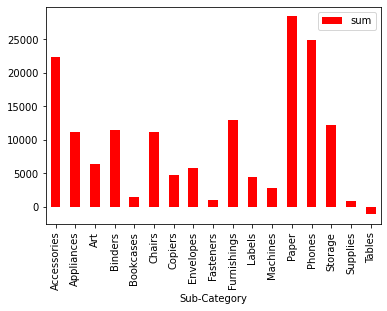

In [ ]:
plt.figure(figsize=(24,10))
data.groupby('Sub-Category')['Profit'].agg(['sum']).plot.bar(color="red")
plt.show()

From the above graph we can see that the papers and phones are generating most of the profit, whereas the tablets,supplies,fasteners,bookcases are generating the least profit

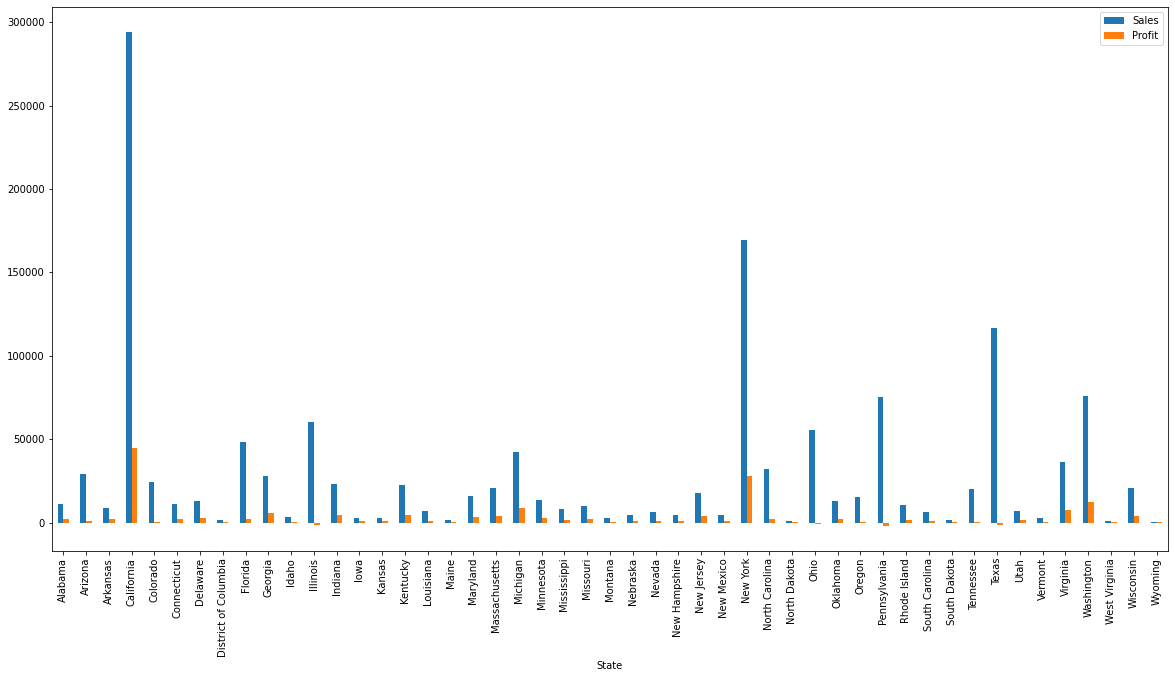

In [ ]:
data_plot = data.groupby(['State'])[['Sales', 'Profit']].sum()
data_plot.plot.bar(figsize = (20,10))

By comparing with all the states we can see that the state of California recives the maximum profit through maximum number of sales

Getting the total number of counts of the shipping modes

In [ ]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

Calculating the percentage of eac shipping mode

In [ ]:
(data['Ship Mode'].value_counts()/len(data['Ship Mode']))*100

Standard Class    59.687281
Second Class      19.474792
First Class       15.405432
Same Day           5.432495
Name: Ship Mode, dtype: float64

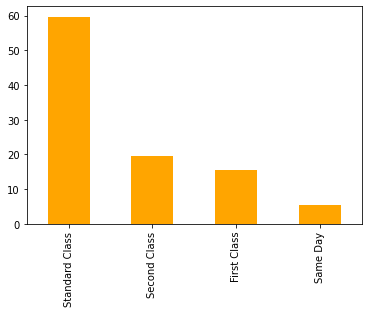

In [ ]:
# Plotting the graph of the percentage ofship mode with respect to each class
((data['Ship Mode'].value_counts()/len(data['Ship Mode']))*100).plot(kind="bar", color="orange")

From above graph we can coclude that maximum number of shipments are happening by standard class